Plot the expected value and variance for the (metcalf) strain correlation score.

Last run at commit 5474a271174f1bab2033177279e164b118be83f9

In [1]:
%reload_ext autoreload
%autoreload 2

# Add parent directory for NPLinker imports
import sys
sys.path.append('..')

In [2]:
import numpy
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


In [3]:
from nplinker.scoring import misc

In [4]:
strains = 100

exp_map = numpy.zeros((strains, strains))
var_map = numpy.zeros((strains, strains))

for i in range(strains):
    for j in range(strains):
        exp, var = misc.metcalf_expected_count(i, j, None, strains, 10, -10, 0, -1)
        exp_map[i, j] = exp
        var_map[i, j] = var


['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getstate__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__setstate__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_add_text', '_adjustable', '_agg_filter', '_alpha', '_anchor', '_animated', '_aspect', '_autoscaleXon', '_autoscaleYon', '_autotitlepos', '_axes', '_axes_class', '_axes_locator', '_axisbelow', '_cachedRenderer', '_clipon', '_clippath', '_connected', '_contains', '_current_image', '_facecolor', '_frameon', '_gci', '_gen_axes_patch', '_gen_axes_spines', '_get_axis_list', '_get_lines', '_get_patches_for_fill', '_get_view', '_gid', '_gridOn', '_hold', '_in_layout', '_init_axis', '_label', '_layoutbox', '_left_title', '_make_twin_axes', '_mouseover', '_mouseover_set', '_navigate', '_navigate_mode', '_oid', '_on_units_ch

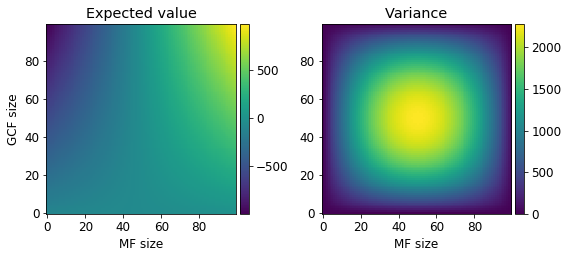

In [49]:

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))

print(dir(ax1))

ax1.set_title('Expected value', size='x-large')
im1 = ax1.imshow(exp_map, origin='lower')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="5%", pad=0.05)

#min_exp = numpy.min(exp_map)
#max_exp = numpy.max(exp_map)
#cbar = fig.colorbar(im1, cax=cax, ticks=[min_exp, 0, max_exp])
#cbar.ax.set_yticklabels(['low', '0', 'high'])
cb1 = fig.colorbar(im1, cax=cax)

ax1.set_xlabel('MF size', size='large')
ax1.set_ylabel('GCF size', size='large')




ax2.set_title('Variance', size='x-large')
im2 = ax2.imshow(var_map, origin='lower')

divider = make_axes_locatable(ax2)
cax = divider.append_axes("right", size="5%", pad=0.05)

#min_var = numpy.min(var_map)
#max_var = numpy.max(var_map)
#cbar = fig.colorbar(im2, cax=cax, ticks=[min_var, max_var])
#cbar.ax.set_yticklabels(['low', 'high'])
cb2 = fig.colorbar(im2, cax=cax)

ax2.set_xlabel('MF size', size='large')


ax1.tick_params(labelsize='large')
ax2.tick_params(labelsize='large')
cb2.ax.tick_params(labelsize='large')
cb1.ax.tick_params(labelsize='large')


fig.tight_layout()

plt.savefig('20200814_graph_correlation_expected_variance.pdf')